# Introduction to Scipy: Fitting data

We have talked about the Numpy and Matplotlib libraries, but there is a third library that is invaluable for Scientific Analysis: [Scipy](http://www.scipy.org). Scipy is basically a very large library of functions that you can use for scientific analysis. A good place to start to find out about the top-level scientific functionality in Scipy is the [Documentation](http://docs.scipy.org/doc/scipy/reference/).

Examples of the functionality include:

* Integration (scipy.integrate)
* Optimization/Fitting (scipy.optimize)
* Interpolation (scipy.interpolate)
* Fourier Transforms (scipy.fftpack)
* Signal Processing (scipy.signal)
* Linear Algebra (scipy.linalg)
* Spatial data structures and algorithms (scipy.spatial)
* Statistics (scipy.stats)
* Multi-dimensional image processing (scipy.ndimage)

and so on.

This week, we will take a look at how to fit models to data. When analyzing scientific data, fitting models to data allows us to determine the parameters of a physical system (assuming the model is correct).

There are a number of routines in Scipy to help with fitting, but we will use the simplest one, ``curve_fit``, which is imported as follows:

In [2]:
import numpy as np
from scipy.optimize import curve_fit

The full documentation for the ``curve_fit`` is available [here](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit), and we will look at a simple example here, which involves fitting a straight line to a dataset.

We first create a fake dataset with some random noise:

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

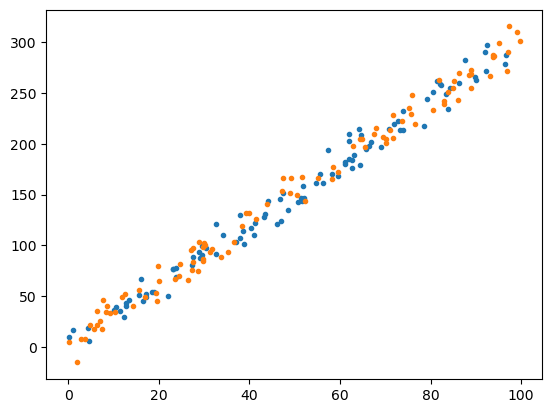

In [5]:
x = np.random.uniform(0., 100., 100)
y = 3. * x + 2. + np.random.normal(0., 10., 100)
plt.plot(x, y, '.')
plt.show()

Let's now imagine that this is real data, and we want to determine the slope and intercept of the best-fit line to the data. We start off by definining a function representing the model:

In [6]:
def line(x, a, b):
    return a * x + b

The arguments to the function should be ``x``, followed by the parameters. We can now call ``curve_fit`` to find the best-fit parameters using a least-squares fit:

In [7]:
popt, pcov = curve_fit(line, x, y)

The ``curve_fit`` function returns two items, which we can ``popt`` and ``pcov``. The ``popt`` argument are the best-fit paramters for ``a`` and ``b``:

In [8]:
popt

array([2.97679612, 3.886766  ])

which is close to the initial values of ``3`` and ``2`` used in the definition of ``y``.

The reason the values are not exact is because there are only a limited number of random samples, so the best-fit slope is not going to be exactly those used in the definition of ``y``. The ``pcov`` variable contains the *covariance* matrix, which indicates the uncertainties and correlations between parameters. This is mostly useful when the data has uncertainties.

Let's now try and fit the data assuming each point has a vertical error (standard deviation) of +/-10:

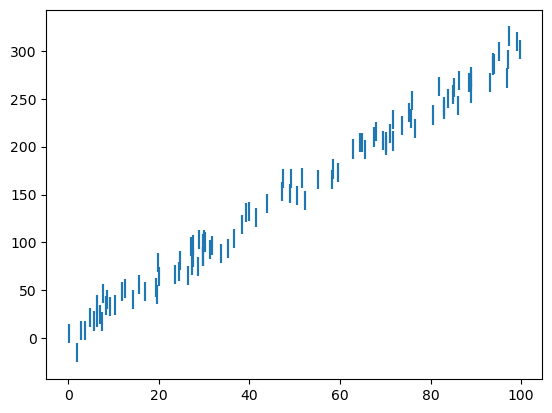

In [10]:
e = np.repeat(10., 100)
plt.errorbar(x, y, yerr=e, fmt="none")
plt.show()

In [11]:
popt, pcov = curve_fit(line, x, y, sigma=e)

In [12]:
popt

array([2.97679612, 3.8867658 ])

Now ``pcov`` will contain the true variance and covariance of the parameters, so that the best-fit parameters are:

In [13]:
print("a =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)

a = 2.9767961199104973 +/- 0.0328994402999058
b = 3.8867657966515026 +/- 1.8919842012565107


We can now plot the best-fit line:

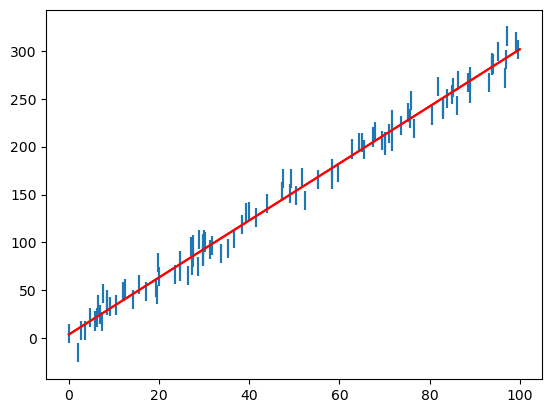

In [15]:
plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 100., 100)  # define values to plot the function for
plt.plot(xfine, line(xfine, popt[0], popt[1]), 'r-')
plt.show()

You should now be able to fit simple models to datasets! Note that for more complex models, more sophisticated techniques may be required for fitting, but ``curve_fit`` will be good enough for most simple cases.

Note that there is a way to simplify the call to the function with the best-fit parameters, which is:

    line(x, *popt)

The * notation will expand a list of values into the arguments of the function. This is useful if your function has more than one or two parameters. Hence, you can do:

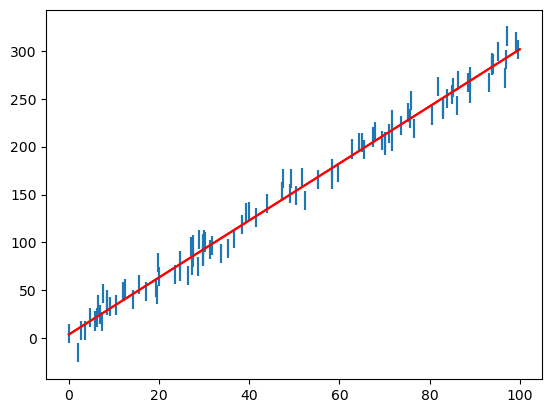

In [17]:
plt.errorbar(x, y, yerr=e, fmt="none")

plt.plot(xfine, line(xfine, *popt), 'r-')
plt.show()

**Important Note:** the way ``curve_fit`` determines the uncertainty is to actually renormalize the errors so that the reduced $\chi^2$ value is one, so the magnitude of the errors doesn't matter, only the relative errors. In some fields of science (such as astronomy) we do *not* renormalize the errors, so for those cases you can specify ``absolute_sigma=True`` in order to preserve the original errors.

## Exercise 1

In the following code, we generate some random data points:

In [18]:
x = np.random.uniform(0., 10., 100)
y = np.polyval([1, 2, -3], x) + np.random.normal(0., 10., 100)
e = np.random.uniform(5, 10, 100)

Fit a line and a parabola to it and overplot the two models on top of the data:

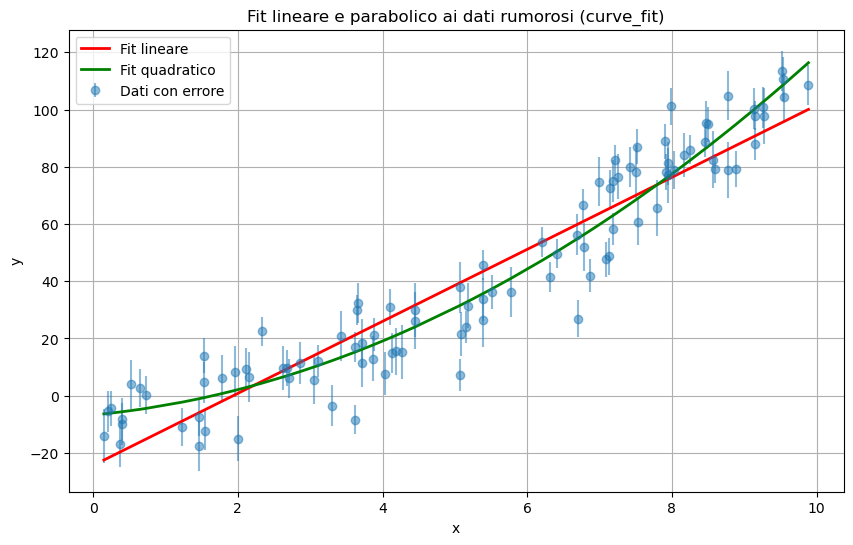

Fit lineare (a, b): [ 12.58076522 -24.34781699]
Fit parabolico (a, b, c): [ 1.01749565  2.3856121  -6.72645686]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dati
x = np.random.uniform(0., 10., 100)
y = np.polyval([1, 2, -3], x) + np.random.normal(0., 10., 100)
e = np.random.uniform(5, 10, 100)

# Definizione dei modelli
def line(x, a, b):
    return a * x + b

def parabola(x, a, b, c):
    return a * x**2 + b * x + c

# Fit lineare
popt_line, pcov_line = curve_fit(line, x, y, sigma=e, absolute_sigma=True)
y_line_fit = line(x, *popt_line)

# Fit parabolico
popt_parabola, pcov_parabola = curve_fit(parabola, x, y, sigma=e, absolute_sigma=True)
y_parabola_fit = parabola(x, *popt_parabola)

# Ordino per grafico più pulito
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_line_sorted = y_line_fit[sorted_indices]
y_parabola_sorted = y_parabola_fit[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=e, fmt='o', label='Dati con errore', alpha=0.5)
plt.plot(x_sorted, y_line_sorted, label='Fit lineare', color='red', linewidth=2)
plt.plot(x_sorted, y_parabola_sorted, label='Fit quadratico', color='green', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fit lineare e parabolico ai dati rumorosi (curve_fit)')
plt.grid()
plt.show()

# Parametri stimati
print("Fit lineare (a, b):", popt_line)
print("Fit parabolico (a, b, c):", popt_parabola)


## Exercise 2

As before, we use the [data/munich_temperatures_average_with_bad_data.txt](data/munich_temperatures_average_with_bad_data.txt) file, which gives the temperature in Munich every day for several years:

In [15]:
# The following code reads in the file and removes bad values
import numpy as np
date, temperature = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt', unpack=True)
keep = np.abs(temperature) < 90
date = date[keep]
temperature = temperature[keep]

Fit the following function to the data:

$$f(t) = a~\cos{(2\pi t + b)} + c$$

where $t$ is the time in years. Make a plot of the data and the best-fit model in the range 2008 to 2012. What are the best-fit values of the parameters? What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year? What is the meaning of the ``b`` parameter, and does its value make sense?

In [16]:

# your solution here
